# Intro notebook
The purpose of this notebook is to connect to a local database that we created by loading CSV files into that database.
Copy / paste this notebook into other places to add / delete cells and add new analysis.

In [320]:
import os
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go

In [64]:
# Define your database file path (SQLite example)
rel_db_path = Path.cwd().parent.parent / 'raw_data' / 'nfl' / 'src_code' / 'nfl.db'
db_file_path = rel_db_path.resolve()
engine = create_engine(f'sqlite:///{db_file_path}')

In [3]:
%load_ext sql

In [4]:
%sql sqlite:///{db_file_path}

In [133]:
%%sql
SELECT *
FROM nfl_results
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


ranker,player,team,fantasy_pos,age,g,gs,pass_cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_yds_per_att,rush_td,targets,rec,rec_yds,rec_yds_per_rec,rec_td,fumbles,fumbles_lost,all_td,two_pt_md,two_pt_pass,fantasy_points,fantasy_points_ppr,draftkings_points,fanduel_points,vbd,fantasy_rank_pos,fantasy_rank_overall,player_id,Year
1,David Johnson*+,ARI,RB,25,16,16,0,0,0,0,0,293,1239,4.23,16,120,80,879,10.99,4,5.0,3,20,1.0,None,328.0,407.8,416.8,367.8,191.0,1,1.0,JohnDa08,2016
2,Ezekiel Elliott*+,DAL,RB,21,15,15,0,0,0,0,0,322,1631,5.07,15,39,32,363,11.34,1,5.0,1,16,None,None,293.0,325.4,332.4,309.4,156.0,2,2.0,ElliEz00,2016
3,Aaron Rodgers*,GNB,QB,33,16,16,401,610,4428,40,7,67,369,5.51,4,0,0,0,None,0,8.0,4,4,1.0,1.0,380.0,380.0,397.0,387.0,119.0,1,3.0,RodgAa00,2016
4,LeSean McCoy*,BUF,RB,28,15,15,0,0,0,0,0,234,1267,5.41,13,57,50,356,7.12,1,3.0,0,14,1.0,None,248.0,298.3,304.3,273.3,111.0,3,4.0,McCoLe01,2016
5,Le'Veon Bell*,PIT,RB,24,12,12,0,1,0,0,0,261,1268,4.86,7,94,75,616,8.21,2,4.0,1,9,1.0,None,242.0,317.4,324.4,279.9,105.0,4,5.0,BellLe00,2016
6,DeMarco Murray*,TEN,RB,28,16,16,1,2,10,1,0,293,1287,4.39,9,67,53,377,7.11,3,3.0,1,12,None,None,241.0,293.8,300.8,267.3,104.0,5,6.0,MurrDe00,2016
7,Devonta Freeman*,ATL,RB,24,16,16,0,0,0,0,0,227,1079,4.75,11,65,54,462,8.56,2,1.0,1,13,None,None,230.0,284.1,291.1,257.1,93.0,6,7.0,FreeDe00,2016
8,LeGarrette Blount,NWE,RB,30,16,8,0,0,0,0,0,299,1161,3.88,18,8,7,38,5.43,0,2.0,1,18,None,None,226.0,232.9,236.9,229.4,89.0,7,8.0,BlouLe00,2016
9,Matt Ryan*+,ATL,QB,31,16,16,373,534,4944,38,7,35,117,3.34,0,0,0,0,None,0,4.0,2,0,1.0,1.0,347.0,347.5,362.5,354.5,87.0,2,9.0,RyanMa00,2016
10,Mike Evans*,TAM,WR,23,16,16,0,0,0,0,0,0,0,None,0,173,96,1321,13.76,12,0.0,0,12,2.0,None,208.0,304.1,307.1,256.1,82.0,1,10.0,EvanMi00,2016


In [136]:
%%sql
DROP TABLE IF EXISTS career_base;
CREATE TABLE career_base AS 
SELECT
    REPLACE(REPLACE(player,'*',''),'+','') AS cleaned_player,
    fantasy_pos,
    age,
    g,
    fantasy_points,
    fantasy_points_ppr,
    fantasy_rank_pos,
    year
FROM nfl_results
;

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.
Done.


[]

In [137]:
%%sql 
SELECT * FROM career_base LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,age,g,fantasy_points,fantasy_points_ppr,fantasy_rank_pos,Year
David Johnson,RB,25,16,328.0,407.8,1,2016
Ezekiel Elliott,RB,21,15,293.0,325.4,2,2016
Aaron Rodgers,QB,33,16,380.0,380.0,1,2016
LeSean McCoy,RB,28,15,248.0,298.3,3,2016
Le'Veon Bell,RB,24,12,242.0,317.4,4,2016
DeMarco Murray,RB,28,16,241.0,293.8,5,2016
Devonta Freeman,RB,24,16,230.0,284.1,6,2016
LeGarrette Blount,RB,30,16,226.0,232.9,7,2016
Matt Ryan,QB,31,16,347.0,347.5,2,2016
Mike Evans,WR,23,16,208.0,304.1,1,2016


In [141]:
best_year = """
DROP TABLE IF EXISTS career_best;
CREATE TABLE career_best AS 
SELECT
    cleaned_player,
    MIN(fantasy_rank_pos) AS best_pos_finish,
    MAX(fppg) AS best_fppg,
    MIN(year) AS best_year
FROM (
    SELECT
        *,
        ROUND(fantasy_points / g) AS fppg,
        RANK() OVER(PARTITION BY cleaned_player ORDER BY ROUND(fantasy_points / g) DESC) AS year_rank
    FROM career_base
    )
WHERE 1=1
    AND year_rank = 1
    AND fppg > 5
GROUP BY 1
;
"""

In [142]:
%%sql
$best_year

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.
Done.


[]

In [143]:
%%sql
SELECT * FROM career_best LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,best_pos_finish,best_fppg,best_year
A.J. Brown,9,13.0,2020
A.J. Green,34,12.0,2016
A.J. McCarron,49,9.0,2019
AJ Dillon,21,9.0,2021
Aaron Jones,3,17.0,2019
Aaron Rodgers,1,24.0,2016
Adam Humphries,32,7.0,2018
Adam Thielen,7,12.0,2018
Adrian Peterson,16,11.0,2018
Aidan O'Connell,28,11.0,2023


In [144]:
career_info = """
SELECT
    *,
    year - first_year AS season_num,
    year - best_year AS season_vs_best,
    year = best_year AS best_flag
FROM (
    SELECT
        base.*,
        ROUND(fantasy_points / g) AS fppg,
        ROUND(fantasy_points_ppr / g) AS ppr_fppg,
        MIN(year) OVER(PARTITION BY base.cleaned_player) AS first_year,
        MAX(year) OVER(PARTITION BY base.cleaned_player) AS last_year,
        best_fppg,
        best_year
    FROM career_base base
    INNER JOIN career_best best
    ON base.cleaned_player = best.cleaned_player
    )
"""

In [52]:
%%sql
$career_info
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,age,g,fantasy_points,fantasy_points_ppr,Year,fppg,ppr_fppg,first_year,last_year,best_fppg,best_year,season_num,season_vs_best,best_flag
A.J. Brown,WR,22,16,165.0,217.1,2019,10.0,14.0,2019,2023,13.0,2020,0,-1,0
A.J. Brown,WR,23,14,178.0,247.5,2020,13.0,18.0,2019,2023,13.0,2020,1,0,1
A.J. Brown,WR,24,13,118.0,180.9,2021,9.0,14.0,2019,2023,13.0,2020,2,1,0
A.J. Brown,WR,25,17,212.0,299.6,2022,12.0,18.0,2019,2023,13.0,2020,3,2,0
A.J. Brown,WR,26,17,184.0,289.6,2023,11.0,17.0,2019,2023,13.0,2020,4,3,0
A.J. Green,WR,28,10,120.0,186.4,2016,12.0,19.0,2016,2022,12.0,2016,0,0,1
A.J. Green,WR,29,16,152.0,226.8,2017,10.0,14.0,2016,2022,12.0,2016,1,1,0
A.J. Green,WR,30,9,103.0,149.4,2018,11.0,17.0,2016,2022,12.0,2016,2,2,0
A.J. Green,WR,32,16,64.0,111.3,2020,4.0,7.0,2016,2022,12.0,2016,4,4,0
A.J. Green,WR,33,16,103.0,156.8,2021,6.0,10.0,2016,2022,12.0,2016,5,5,0


In [60]:
career_agg = """
SELECT
    fantasy_pos,
    year - best_year AS season_vs_best,
    COUNT(1) AS player_cnt,
    AVG(fppg) AS avg_fppg
FROM (
    SELECT
        base.*,
        ROUND(fantasy_points / g) AS fppg,
        ROUND(fantasy_points_ppr / g) AS ppr_fppg,
        MIN(year) OVER(PARTITION BY base.cleaned_player) AS first_year,
        MAX(year) OVER(PARTITION BY base.cleaned_player) AS last_year,
        best_fppg,
        best_year
    FROM career_base base
    INNER JOIN career_best best
    ON base.cleaned_player = best.cleaned_player
    )
GROUP BY 1, 2
"""

In [61]:
%%sql
$career_agg
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,season_vs_best,player_cnt,avg_fppg
QB,-7,1,15.0
QB,-6,2,8.0
QB,-5,7,6.142857142857143
QB,-4,13,9.181818181818182
QB,-3,21,9.25
QB,-2,34,9.96875
QB,-1,62,10.946428571428571
QB,0,124,14.975806451612904
QB,1,91,10.920454545454545
QB,2,64,11.704918032786885


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


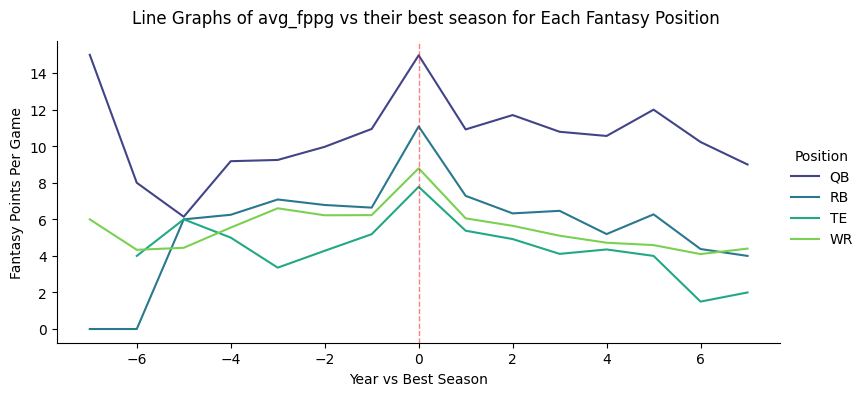

In [65]:
career_agg_data = %sql $career_agg

# Sample DataFrame
data = pd.DataFrame(career_agg_data)

# Create a FacetGrid
g = sns.FacetGrid(data, hue="fantasy_pos", aspect=2, height=4, palette='viridis')

# Map the lineplot onto the grid
g.map(sns.lineplot, "season_vs_best", "avg_fppg").add_legend(title='Position')

# Add vertical lines where year_vs_first_injured is zero
for ax in g.axes.flat:
    ax.axvline(x=0, color='r', linestyle='--', linewidth=1,alpha=0.5)

# Customize the plot
g.set_axis_labels("Year vs Best Season", "Fantasy Points Per Game")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Line Graphs of avg_fppg vs their best season for Each Fantasy Position')

plt.show()


In [157]:
career_detail = """
SELECT
    cleaned_player,
    fantasy_pos,
    best_year,
    year - best_year AS season_vs_best,
    fppg AS avg_fppg
FROM (
    SELECT
        base.*,
        ROUND(fantasy_points / g) AS fppg,
        ROUND(fantasy_points_ppr / g) AS ppr_fppg,
        MIN(year) OVER(PARTITION BY base.cleaned_player) AS first_year,
        MAX(year) OVER(PARTITION BY base.cleaned_player) AS last_year,
        best_fppg,
        best_year
    FROM career_base base
    INNER JOIN career_best best
    ON base.cleaned_player = best.cleaned_player
    WHERE 1=1
        AND best_year > '2017'
        AND best_pos_finish < 30
    )
WHERE 1=1
    AND NOT (last_year = best_year AND first_year = best_year)
    AND (last_year - best_year > 2 OR best_year >= 2021)
    AND fppg IS NOT NULL
    AND last_year = '2023'
ORDER BY best_year ASC, fantasy_pos ASC, RANDOM()
"""

In [158]:
%%sql
$career_detail
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,best_year,season_vs_best,avg_fppg
Baker Mayfield,QB,2018,4,10.0
Kyle Allen,QB,2018,4,8.0
Kyle Allen,QB,2018,2,11.0
Mitchell Trubisky,QB,2018,-1,11.0
Jared Goff,QB,2018,-1,17.0
Patrick Mahomes,QB,2018,-1,10.0
Baker Mayfield,QB,2018,2,16.0
Patrick Mahomes,QB,2018,0,26.0
Patrick Mahomes,QB,2018,4,24.0
Jared Goff,QB,2018,5,17.0


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


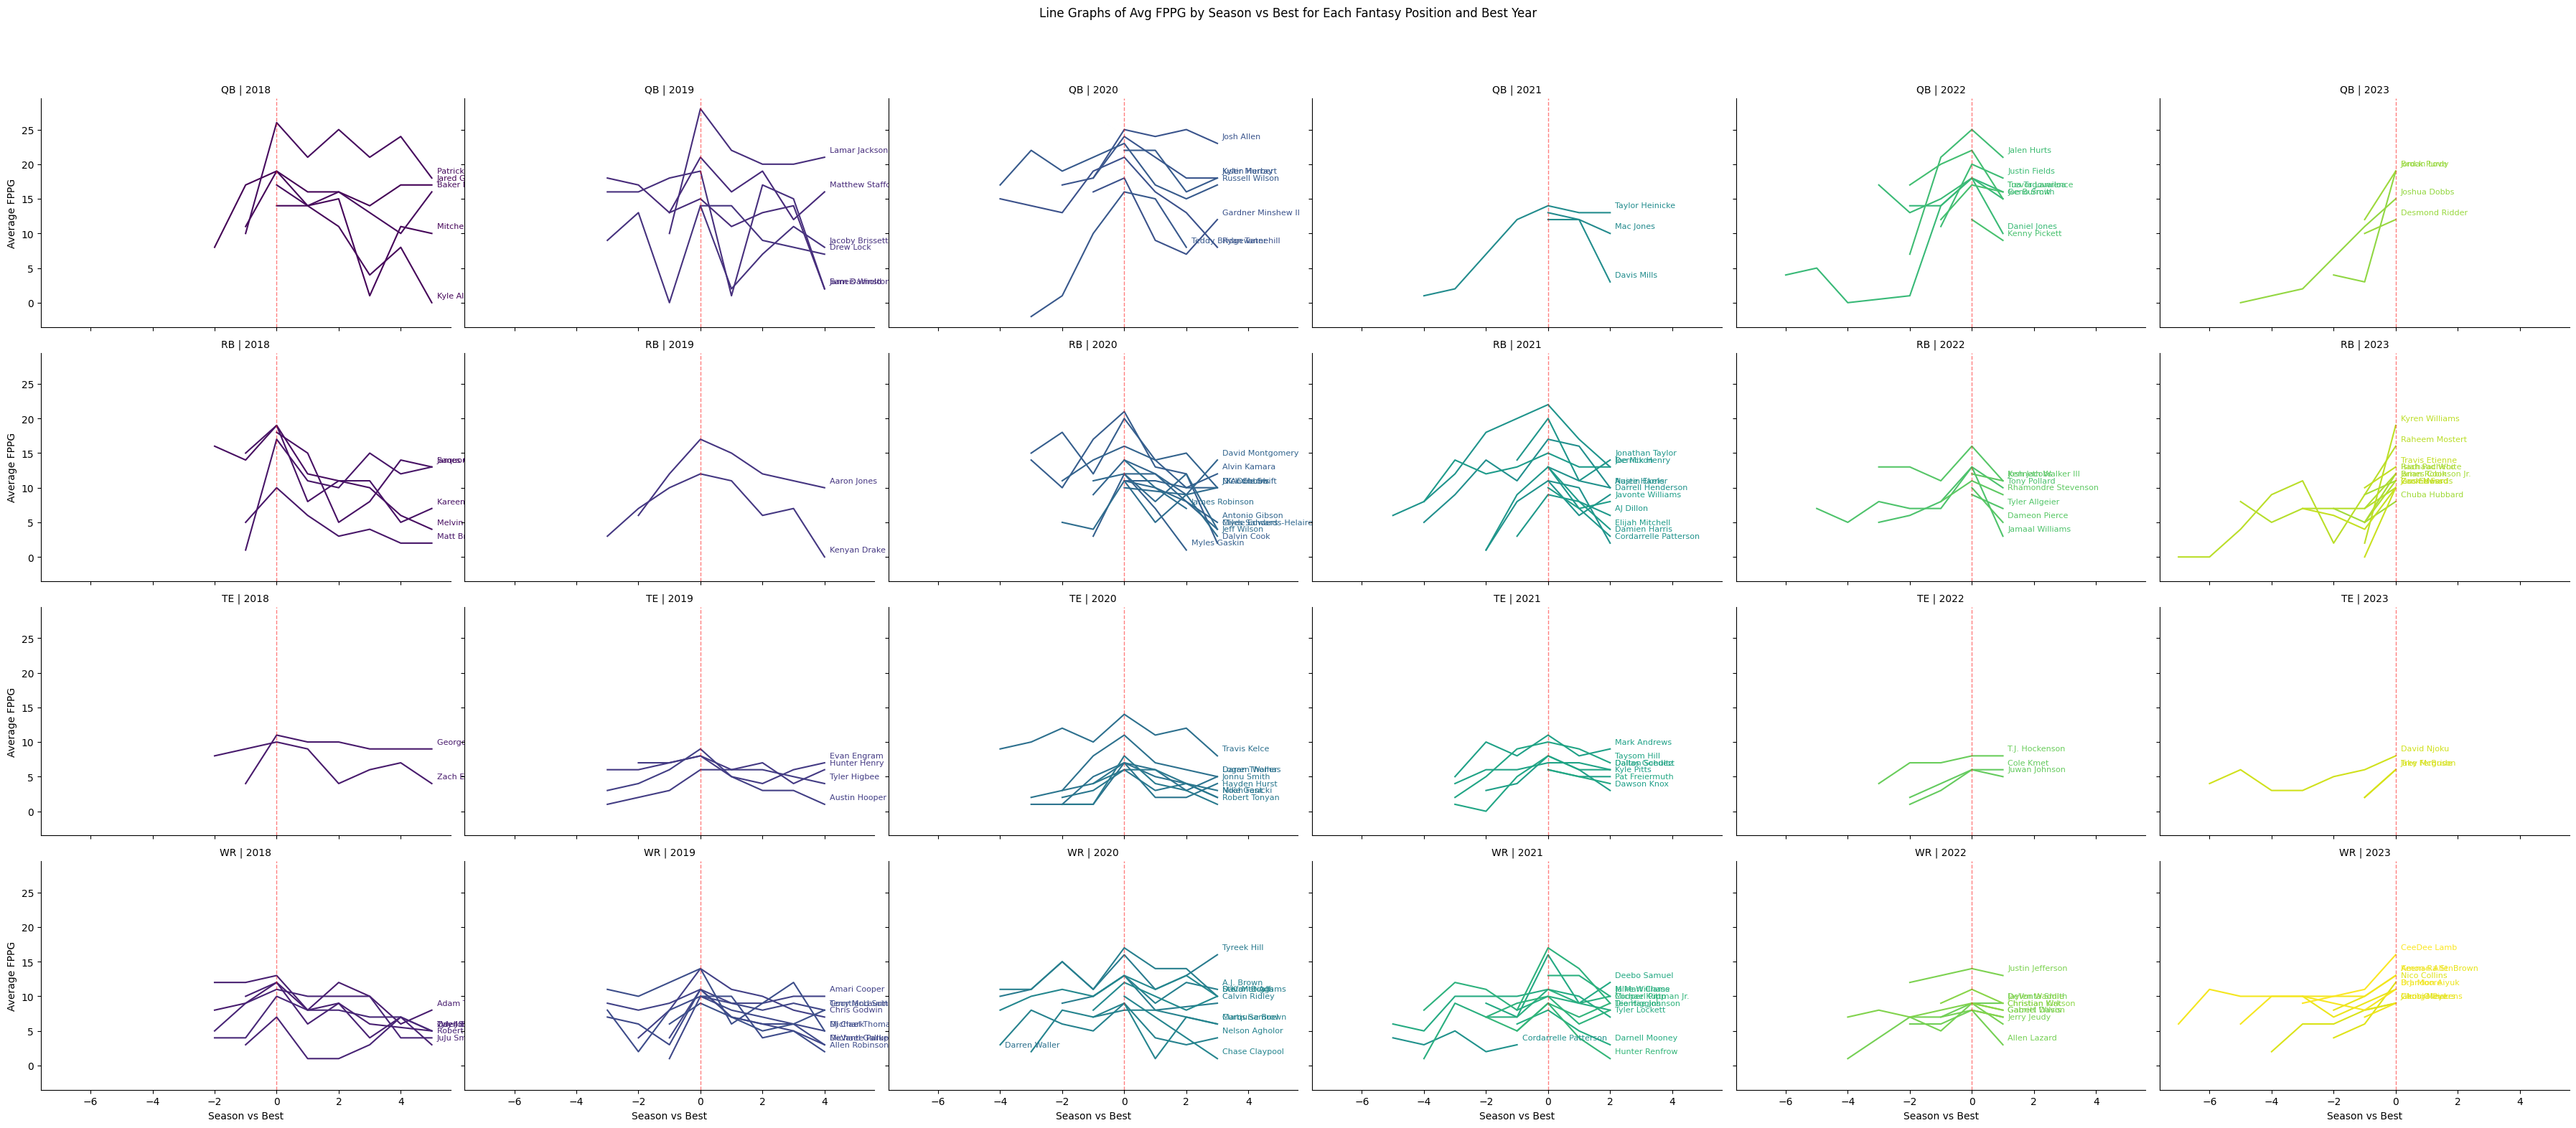

In [162]:
career_detail_data = %sql $career_detail

# Sample DataFrame
data = pd.DataFrame(career_detail_data)

unique_players = random.shuffle(data["cleaned_player"].unique().tolist())

# Create a FacetGrid
g = sns.FacetGrid(data, row="fantasy_pos", col="best_year", hue="cleaned_player", aspect=1.5, height=4, palette='viridis', hue_order=unique_players)

# Map the lineplot onto the grid
g.map(sns.lineplot, "season_vs_best", "avg_fppg")

# Add vertical lines where season vs best is zero
for ax in g.axes.flat:
    for line in ax.get_lines():
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        label = line.get_label()
        # Annotate at the last point of each line
        ax.annotate(label, xy=(x_data[-1], y_data[-1]), xytext=(5, 5), textcoords='offset points', fontsize=8, color=line.get_color())    
    ax.axvline(x=0, color='r', linestyle='--', linewidth=1,alpha=0.5)

# Customize the plot
g.set_axis_labels("Season vs Best", "Average FPPG")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Line Graphs of Avg FPPG by Season vs Best for Each Fantasy Position and Best Year')

plt.show()


# Peaks and valleys 
We have looked at what the global maximu is in 2024 for the time range from 2016-2023.  
But, what would this have tought us in 2023 when we look at 2016 - 2022?   
What about 2022 when we look at 2016 - 2021?  



Let's look at tyreek as an example:
- in 2017, looking at 2016, it would've been the global
- in 2018, looking at 2016 - 2017, 2017 would've been the global
- in 2019, look 2016 - 2018, 2018 is the global
- in 2020, look 2016 - 2019, we see a drop of 4 points per game, 2018 is the global
- in 2021
- in 2022
- in 2023


In [299]:
player_cycle = """
SELECT 
    cleaned_player,
    fantasy_pos,
    year,
    fppg,
    best_ff_pos,
    ROUND((fppg / prev_fppg1) - 1,2) AS this_growth,
    ROUND((prev_fppg1 / prev_fppg2) - 1,2) AS prev_growth,
    (year - min_year) + 1 AS year_in_data
FROM (
    SELECT
        *,
        ROUND(fantasy_points / g) AS fppg,
        MIN(fantasy_rank_pos) OVER(PARTITION BY cleaned_player) AS best_ff_pos,
        MIN(year) OVER (PARTITION BY cleaned_player) AS min_year,
        LAG(ROUND(fantasy_points / g)) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg1,
        LAG(ROUND(fantasy_points / g), 2) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg2
    FROM career_base
    WHERE 1=1
        AND ROUND(fantasy_points / g) > 1.0
    )
WHERE 1=1
    AND min_year >= '2017'
    AND year - min_year >= 2
    AND fantasy_pos != 'FB'
"""

# removed this from the query so that we aren't selecting only for players that HAVE been good at one point
# -- AND best_ff_pos < 30
# should i also remove the 2017 filter? no, we need to make sure we don't treat players in 2016 like they are rookies just because it is the first year in the data.

In [211]:
%%sql
SELECT
    *,
    ROUND(fantasy_points / g) AS fppg,
    MIN(fantasy_rank_pos) OVER(PARTITION BY cleaned_player) AS best_ff_pos,
    MIN(year) OVER (PARTITION BY cleaned_player) AS min_year,
    LAG(ROUND(fantasy_points / g)) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg1,
    LAG(ROUND(fantasy_points / g), 2) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg2
FROM career_base
WHERE 1=1
    AND (
        cleaned_player LIKE 'James Conn%'
        OR cleaned_player LIKE 'Mike Williams%'
    )

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,age,g,fantasy_points,fantasy_points_ppr,fantasy_rank_pos,Year,fppg,best_ff_pos,min_year,prev_fppg1,prev_fppg2
James Conner,RB,22,14,14.0,14.4,102,2017,1.0,5,2017,None,None
James Conner,RB,23,13,225.0,280.0,7,2018,17.0,5,2017,1.0,None
James Conner,RB,24,10,112.0,145.5,33,2019,11.0,5,2017,17.0,1.0
James Conner,RB,25,13,130.0,164.6,25,2020,10.0,5,2017,11.0,17.0
James Conner,RB,26,15,221.0,257.7,5,2021,15.0,5,2017,10.0,11.0
James Conner,RB,27,13,154.0,200.2,19,2022,12.0,5,2017,15.0,10.0
James Conner,RB,28,13,175.0,201.5,15,2023,13.0,5,2017,12.0,15.0
James Cook,RB,23,16,85.0,105.7,45,2022,5.0,11,2022,None,None
James Cook,RB,24,17,189.0,232.7,11,2023,11.0,11,2022,5.0,None
Mike Williams,WR,23,10,10.0,20.5,152,2017,1.0,9,2017,None,None


In [223]:
%%sql
$player_cycle
AND (ABS(this_growth) > 2)
ORDER BY this_growth DESC

--these are MASSIVE breakout playes w/ more than 200% growth in a seaons that we should keep in mind, but fall outside of teh range of this analysis because they skew results

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,Year,fppg,best_ff_pos,this_growth,prev_growth,year_in_data
Mitchell Trubisky,QB,2022,11.0,15,10.0,-0.93,5
Teddy Bridgewater,QB,2019,10.0,18,9.0,-1.5,2
Robert Tonyan,TE,2020,8.0,4,7.0,0.0,2
Curtis Samuel,WR,2022,7.0,25,6.0,-0.89,5
Logan Thomas,TE,2020,7.0,8,6.0,0.0,3
Jordan Love,QB,2023,19.0,5,5.33,-0.25,2
Taylor Heinicke,QB,2020,12.0,20,5.0,1.0,3
Joshua Dobbs,QB,2022,11.0,20,4.5,None,4
Jacob Hollister,TE,2019,5.0,28,4.0,None,2
Jordan Akins,TE,2022,5.0,16,4.0,-0.75,4


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


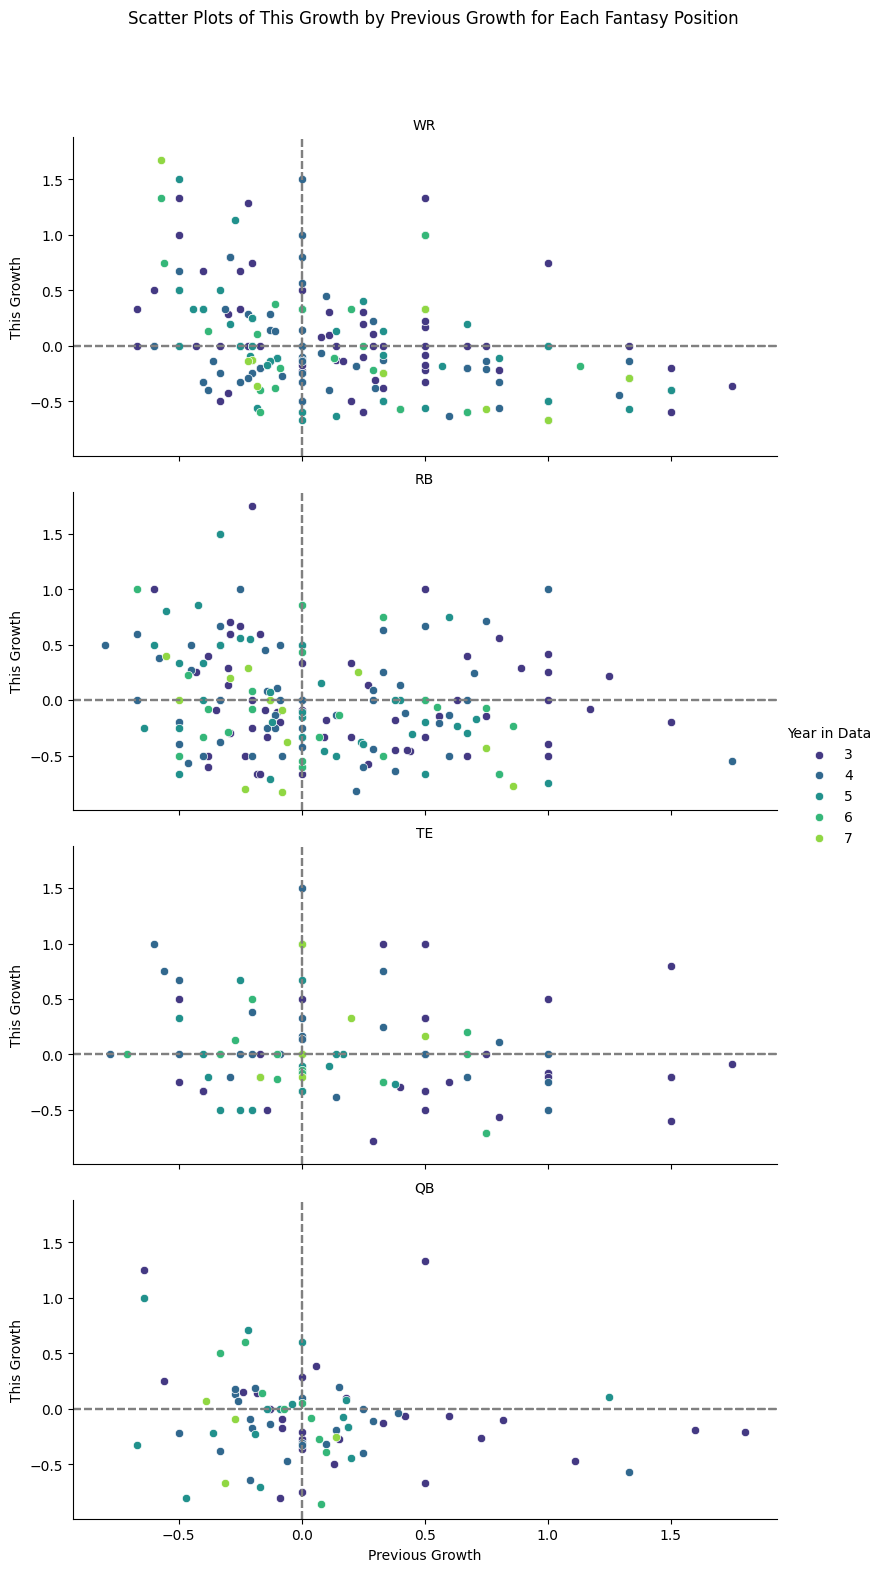

In [300]:
player_cycle_data = %sql $player_cycle AND ABS(this_growth) < 2 AND ABS(prev_growth) < 2

# Sample DataFrame (replace with your actual DataFrame)
data = pd.DataFrame(player_cycle_data)

# Create a FacetGrid
g = sns.FacetGrid(data, row="fantasy_pos", hue="year_in_data", aspect=2, height=4, palette='viridis')

# Function to add reference lines
def add_ref_lines(*args, **kwargs):
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    sns.scatterplot(x=args[0], y=args[1], **kwargs)

# Map the scatterplot onto the grid
g.map(add_ref_lines, "prev_growth", "this_growth").add_legend(title='Year in Data')

# Customize the plot
g.set_axis_labels("Previous Growth", "This Growth")
g.set_titles(row_template="{row_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of This Growth by Previous Growth for Each Fantasy Position')

plt.show()


In [301]:
%%sql
$player_cycle
AND this_growth > 0
AND prev_growth > 0
ORDER BY fantasy_pos, this_growth DESC

-- these are players that somehow STACKED another good season ONTOP of a good season the prior year
-- amazing, it has only EVER happened a handful of times
-- these are players in teh TOP RIGHT quadrant in all of the graphs

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,Year,fppg,best_ff_pos,this_growth,prev_growth,year_in_data
P.J. Walker,QB,2022,7.0,44,1.33,0.5,3
Josh Allen,QB,2020,25.0,1,0.39,0.06,3
Joshua Dobbs,QB,2023,15.0,20,0.36,4.5,4
Daniel Jones,QB,2022,18.0,9,0.2,0.15,4
Jalen Hurts,QB,2022,25.0,2,0.19,2.0,3
Taylor Heinicke,QB,2021,14.0,20,0.17,5.0,4
Mason Rudolph,QB,2023,10.0,30,0.11,1.25,5
Joe Burrow,QB,2022,22.0,4,0.1,0.18,3
Sam Darnold,QB,2022,14.0,27,0.08,0.18,5
Kalen Ballage,RB,2020,6.0,58,1.0,0.5,3


In [347]:
%%sql
WITH CYCLE AS ($player_cycle)
SELECT * FROM CYCLE GROUP BY 1
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,year,fppg,best_ff_pos,this_growth,prev_growth,year_in_data
A.J. Brown,WR,2021,9.0,4,-0.31,0.3,3
AJ Dillon,RB,2022,8.0,21,-0.11,2.0,3
Aaron Jones,RB,2019,17.0,3,0.42,1.0,3
Adam Shaheen,TE,2020,2.0,46,0.0,0.0,4
Adam Trautman,TE,2022,2.0,36,-0.33,0.5,3
Albert Okwuegbunam,TE,2022,2.0,30,-0.33,-0.4,3
Alex Erickson,WR,2019,3.0,82,0.5,None,3
Alexander Mattison,RB,2021,6.0,38,0.0,0.5,3
Allen Lazard,WR,2021,7.0,29,0.0,0.75,3
Alvin Kamara,RB,2019,12.0,2,-0.33,0.2,3


In [244]:
%%sql
WITH player_cycle AS ( $player_cycle)
SELECT
    CASE
        WHEN this_growth > 0 AND prev_growth > 0 THEN 'Double stack'
        WHEN this_growth > 0 AND prev_growth < 0 THEN 'Bounce back'
        WHEN this_growth < 0 AND prev_growth > 0 THEN 'Regression'
        WHEN this_growth < 0 AND prev_growth < 0 THEN 'Spiral'
        ELSE 'Untagged'
        END AS career_tag,
    fantasy_pos,
    COUNT(1) AS player_count,
    ROUND(AVG(this_growth),2) AS avg_stacked_growth,    
    ROUND(AVG(prev_growth),2) AS avg_previous_growth,
    ROUND(AVG(fppg),2) AS avg_fppg
FROM player_cycle
WHERE 1=1
GROUP BY 1, 2
ORDER BY 2, 1

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


career_tag,fantasy_pos,player_count,avg_stacked_growth,avg_previous_growth,avg_fppg
Bounce back,QB,15,1.85,-0.38,16.13
Double stack,QB,9,0.79,2.45,17.89
Regression,QB,24,-0.29,0.82,14.5
Spiral,QB,9,-0.25,-0.2,10.44
Untagged,QB,14,0.28,-0.08,14.31
Bounce back,RB,32,0.63,-0.35,10.97
Double stack,RB,15,0.4,1.63,15.13
Regression,RB,41,-0.36,1.09,8.71
Spiral,RB,32,-0.37,-0.26,5.97
Untagged,RB,23,-0.03,-0.04,9.14


In [269]:
%%sql
WITH player_cycle AS ( $player_cycle)
SELECT
   * 
FROM player_cycle
WHERE 1=1
    AND (this_growth = 0 OR prev_growth = 0)
    AND fantasy_pos = 'WR'

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,year,fppg,best_ff_pos,this_growth,prev_growth,year_in_data
Allen Lazard,WR,2021,7.0,29,0.0,0.75,4
Allen Lazard,WR,2022,8.0,29,0.14,0.0,5
Ashton Dulin,WR,2022,2.0,111,0.0,None,4
Brandon Powell,WR,2021,1.0,96,0.0,-0.5,4
Brandon Powell,WR,2022,1.0,96,0.0,0.0,5
Brandon Powell,WR,2023,2.0,96,1.0,0.0,6
Brandon Zylstra,WR,2020,1.0,124,0.0,None,3
Brandon Zylstra,WR,2021,2.0,124,1.0,0.0,4
Braxton Berrios,WR,2023,2.0,61,0.0,-0.6,5
C.J. Board,WR,2021,1.0,168,0.0,0.0,3


In [262]:
%%sql
WITH player_cycle AS ( $player_cycle)
SELECT
    fantasy_pos,
    year_in_data,
    COUNT(1) AS player_count,
    ROUND(AVG(this_growth),2) AS avg_stacked_growth,    
    ROUND(AVG(prev_growth),2) AS avg_previous_growth  
FROM player_cycle
WHERE 1=1
AND this_growth > 0
AND prev_growth > 0
GROUP BY 1, 2
ORDER BY 1, 2

/*
wow, this is cool to see
ONLY 54 times has someone EVER stacked a good season ONTOP of a good season
someone has only grown their fantasy points 2 years in a row 54 times!!

for RBs, 50% have happened in their 3rd year and 
for WRs, 50% have happened in their 3rd year too!

you WANT 3rd year players who had a growth in their second year? I'm sure that some of them have negetive correlation but some clearly double stack growth too

we need to look at if we should buy the dip, how does someone go from down year to spiral or to bounce back
and how someone ends up in double stack vs regression bucket

we're basically trying to explain how someone ends up on the vertical axis
*/


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,year_in_data,player_count,avg_stacked_growth,avg_previous_growth
QB,3,4,0.5,0.69
QB,4,3,1.93,3.38
QB,5,3,0.12,2.14
QB,6,1,0.36,4.5
RB,3,12,0.51,2.03
RB,4,5,0.42,0.54
RB,5,3,0.8,0.56
RB,6,1,0.75,0.33
RB,7,1,0.25,0.23
TE,3,10,0.59,1.28


In [260]:
%%sql
WITH player_cycle AS (
SELECT 
    cleaned_player,
    fantasy_pos,
    year,
    fppg,
    best_ff_pos,
    ROUND((fppg / prev_fppg1) - 1,2) AS this_growth,
    ROUND((prev_fppg1 / prev_fppg2) - 1,2) AS prev_growth,
    (year - min_year) + 1 AS year_in_data
FROM (
    SELECT
        *,
        ROUND(fantasy_points / g) AS fppg,
        MIN(fantasy_rank_pos) OVER(PARTITION BY cleaned_player) AS best_ff_pos,
        MIN(year) OVER (PARTITION BY cleaned_player) AS min_year,
        LAG(ROUND(fantasy_points / g)) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg1,
        LAG(ROUND(fantasy_points / g), 2) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg2
    FROM career_base
    WHERE 1=1
    )
WHERE 1=1
    AND min_year >= '2017'
)
SELECT
*
FROM player_cycle
WHERE year = '2023'
    AND this_growth > 0
    AND (year_in_data = 2 OR year_in_data = 3)
ORDER BY fantasy_pos, year_in_data ASC, fppg DESC

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,year,fppg,best_ff_pos,this_growth,prev_growth,year_in_data
Brock Purdy,QB,2023,19.0,6,0.58,None,2
Desmond Ridder,QB,2023,12.0,22,0.2,None,2
Jordan Love,QB,2023,19.0,5,5.33,-0.25,3
Kyren Williams,RB,2023,19.0,4,8.5,None,2
Travis Etienne,RB,2023,13.0,3,0.3,None,2
Isiah Pacheco,RB,2023,12.0,17,0.71,None,2
Rachaad White,RB,2023,12.0,8,1.4,None,2
Brian Robinson Jr.,RB,2023,11.0,22,0.22,None,2
James Cook,RB,2023,11.0,11,1.2,None,2
Jaylen Warren,RB,2023,8.0,30,1.0,None,2


In [277]:
%%sql
SELECT 
   *,
    ROUND((fppg / prev_fppg1) - 1,2) AS this_growth,
    ROUND((prev_fppg1 / prev_fppg2) - 1,2) AS prev_growth,
    (year - min_year) + 1 AS year_in_data,
ROUND((fppg / prev_fppg1) - 1,2) > 0 AS good
FROM (
    SELECT
        *,
        ROUND(fantasy_points / g) AS fppg,
        MIN(fantasy_rank_pos) OVER(PARTITION BY cleaned_player) AS best_ff_pos,
        MIN(year) OVER (PARTITION BY cleaned_player) AS min_year,
        LAG(ROUND(fantasy_points / g)) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg1,
        LAG(ROUND(fantasy_points / g), 2) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg2
    FROM career_base
    WHERE 1=1
    )
WHERE 1=1
    AND min_year >= '2017'
    AND fantasy_pos != 'FB'
limit 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,age,g,fantasy_points,fantasy_points_ppr,fantasy_rank_pos,Year,fppg,best_ff_pos,min_year,prev_fppg1,prev_fppg2,this_growth,prev_growth,year_in_data,good
A.J. Brown,WR,22,16,165.0,217.1,9,2019,10.0,4,2019,None,None,None,None,1,None
A.J. Brown,WR,23,14,178.0,247.5,9,2020,13.0,4,2019,10.0,None,0.3,None,2,1
A.J. Brown,WR,24,13,118.0,180.9,32,2021,9.0,4,2019,13.0,10.0,-0.31,0.3,3,0
A.J. Brown,WR,25,17,212.0,299.6,4,2022,12.0,4,2019,9.0,13.0,0.33,-0.31,4,1
A.J. Brown,WR,26,17,184.0,289.6,8,2023,11.0,4,2019,12.0,9.0,-0.08,0.33,5,0
A.T. Perry,WR,24,10,49.0,60.6,85,2023,5.0,85,2023,None,None,None,None,1,None
AJ Dillon,RB,22,11,38.0,40.3,77,2020,3.0,21,2020,None,None,None,None,1,None
AJ Dillon,RB,23,17,152.0,185.6,21,2021,9.0,21,2020,3.0,None,2.0,None,2,1
AJ Dillon,RB,24,17,140.0,167.6,26,2022,8.0,21,2020,9.0,3.0,-0.11,2.0,3,0
AJ Dillon,RB,25,15,96.0,117.6,40,2023,6.0,21,2020,8.0,9.0,-0.25,-0.11,4,0


In [302]:
%%sql
SELECT
COUNT(1)
FROM (
    SELECT
        *,
        ROUND(fantasy_points / g) AS fppg,
        MIN(fantasy_rank_pos) OVER(PARTITION BY cleaned_player) AS best_ff_pos,
        MIN(year) OVER (PARTITION BY cleaned_player) AS min_year,
        LAG(ROUND(fantasy_points / g)) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg1,
        LAG(ROUND(fantasy_points / g), 2) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg2
    FROM career_base
    WHERE 1=1
        AND ROUND(fantasy_points / g) > 1
    )
WHERE 1=1
    AND min_year >= '2017'
    AND fantasy_pos != 'FB'

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


COUNT(1)
1641


In [297]:
%%sql
SELECT
* ,
    ROUND((fppg / prev_fppg1) - 1,2) AS this_growth,
    ROUND((prev_fppg1 / prev_fppg2) - 1,2) AS prev_growth
FROM (
    SELECT
        *,
        ROUND(fantasy_points / g) AS fppg,
        MIN(fantasy_rank_pos) OVER(PARTITION BY cleaned_player) AS best_ff_pos,
        MIN(year) OVER (PARTITION BY cleaned_player) AS min_year,
        LAG(ROUND(fantasy_points / g)) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg1,
        LAG(ROUND(fantasy_points / g), 2) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg2
    FROM career_base
    WHERE 1=1
        AND fppg IS NOT NULL
        AND ROUND(fantasy_points / g) > 1
    )
WHERE 1=1
    AND min_year >= '2017'
    AND fantasy_pos != 'FB'
    AND ROUND((fppg / prev_fppg1) - 1,2) IS NULL
    AND ROUND((prev_fppg1 / prev_fppg2) - 1,2) IS NULL
    AND min_year != year
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,age,g,fantasy_points,fantasy_points_ppr,fantasy_rank_pos,Year,fppg,best_ff_pos,min_year,prev_fppg1,prev_fppg2,this_growth,prev_growth


In [303]:
%%sql
SELECT
    ROUND((fppg / prev_fppg1) - 1,2) >= 0 AS this_growth_good,
    COUNT(1) AS season_cnt,
    AVG(year - min_year) AS avg_years
FROM (
    SELECT
        *,
        ROUND(fantasy_points / g) AS fppg,
        MIN(fantasy_rank_pos) OVER(PARTITION BY cleaned_player) AS best_ff_pos,
        MIN(year) OVER (PARTITION BY cleaned_player) AS min_year,
        LAG(ROUND(fantasy_points / g)) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg1,
        LAG(ROUND(fantasy_points / g), 2) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg2
    FROM career_base
    WHERE 1=1
        AND fppg IS NOT NULL
        AND ROUND(fantasy_points / g) > 1.0
    )
WHERE 1=1
    AND min_year >= '2017'
    AND fantasy_pos != 'FB'
GROUP BY 1
ORDER BY 2, 1

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


this_growth_good,season_cnt,avg_years
0,450,2.577777777777778
1,562,2.2348754448398576
None,629,0.0


In [304]:
%%sql
SELECT
    ROUND((fppg / prev_fppg1) - 1,2) >= 0 AS this_growth_good,
    ROUND((prev_fppg1 / prev_fppg2) - 1,2) >= 0 AS prev_growth_good,
    COUNT(1) AS season_cnt,
    AVG(year - min_year) AS avg_years
FROM (
    SELECT
        *,
        ROUND(fantasy_points / g) AS fppg,
        MIN(fantasy_rank_pos) OVER(PARTITION BY cleaned_player) AS best_ff_pos,
        MIN(year) OVER (PARTITION BY cleaned_player) AS min_year,
        LAG(ROUND(fantasy_points / g)) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg1,
        LAG(ROUND(fantasy_points / g), 2) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg2
    FROM career_base
    WHERE 1=1
        AND fppg IS NOT NULL
        AND ROUND(fantasy_points / g) > 1.0
    )
WHERE 1=1
    AND min_year >= '2017'
    AND fantasy_pos != 'FB'
GROUP BY 1, 2
ORDER BY 1, 2

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


this_growth_good,prev_growth_good,season_cnt,avg_years
None,None,629,0.0
0,None,140,1.1857142857142857
0,0,97,3.4536082474226806
0,1,213,3.0938967136150235
1,None,264,1.1742424242424243
1,0,152,3.3223684210526314
1,1,146,3.0205479452054793


In [ ]:
AND year - min_year >= 2

if you are a rookie, you won't have a growth rate at all
if you are a second year player, you won't have a previous growth rate

# Chat gpt directions
Python code for a seaborn chart with these specifications
Chart style: scatter
Grid rows: fantasy_pos
Grid columns: none
X-axis: prev_growth
Y-axis: this_growth
Color: year_in_data

# Okay, let's take a fresh look at this

In [308]:
%%sql
WITH player_cycle AS ($player_cycle)
SELECT
    *
FROM player_cycle
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,fantasy_pos,year,fppg,best_ff_pos,this_growth,prev_growth,year_in_data
A.J. Brown,WR,2021,9.0,4,-0.31,0.3,3
A.J. Brown,WR,2022,12.0,4,0.33,-0.31,4
A.J. Brown,WR,2023,11.0,4,-0.08,0.33,5
AJ Dillon,RB,2022,8.0,21,-0.11,2.0,3
AJ Dillon,RB,2023,6.0,21,-0.25,-0.11,4
Aaron Jones,RB,2019,17.0,3,0.42,1.0,3
Aaron Jones,RB,2020,15.0,3,-0.12,0.42,4
Aaron Jones,RB,2021,12.0,3,-0.2,-0.12,5
Aaron Jones,RB,2022,11.0,3,-0.08,-0.2,6
Aaron Jones,RB,2023,10.0,3,-0.09,-0.08,7


In [318]:
%%sql
WITH player_cycle AS ($player_cycle)
SELECT
    CASE
        WHEN prev_season = 'Stable' AND this_season = 'Stable' THEN '1 - Stable'
        WHEN prev_season = 'Stable' AND this_season = 'Good' THEN '2 - Bounce back'
        WHEN prev_season = 'Stable' AND this_season = 'Bad' THEN '3 - Regress'
        WHEN prev_season = 'Good' AND this_season = 'Good' THEN '4 - DOUBLE stack'
        WHEN prev_season = 'Good' AND this_season = 'Stable' THEN '5 - Step back'
        WHEN prev_season = 'Good' AND this_season = 'Bad' THEN '6 - Regress'
        WHEN prev_season = 'Bad' AND this_season = 'Bad' THEN '7 - Spiral'
        WHEN prev_season = 'Bad' AND this_season = 'Stable' THEN '8 - Holding'
        WHEN prev_season = 'Bad' AND this_season = 'Good' THEN '9 - Bounce back'
        ELSE 'Untagged'
        END AS career_arc_order,
    *
FROM (
    SELECT
        fantasy_pos,
        CASE
            WHEN prev_growth > 0 THEN 'Good'
            WHEN prev_growth < 0 THEN 'Bad'
            ELSE 'Stable'
            END AS prev_season,
        CASE
            WHEN this_growth > 0 THEN 'Good'
            WHEN this_growth < 0 THEN 'Bad'
            ELSE 'Stable'
            END AS this_season,
        COUNT(1) AS arc_count,
        ROUND(AVG(prev_growth),3) AS avg_1st,
        ROUND(AVG(this_growth),3) AS avg_2nd,
        ROUND(AVG(fppg),3) AS avg_fppg
    FROM player_cycle
    GROUP BY 1, 2, 3
)
ORDER BY 2, 1 ASC

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


career_arc_order,fantasy_pos,prev_season,this_season,arc_count,avg_1st,avg_2nd,avg_fppg
2 - Bounce back,QB,Stable,Good,10,0.0,2.079,12.7
3 - Regress,QB,Stable,Bad,12,0.0,-0.396,7.25
4 - DOUBLE stack,QB,Good,Good,9,1.536,0.326,16.667
5 - Step back,QB,Good,Stable,2,1.125,0.0,7.0
6 - Regress,QB,Good,Bad,28,0.835,-0.287,13.679
7 - Spiral,QB,Bad,Bad,17,-0.255,-0.365,7.706
8 - Holding,QB,Bad,Stable,4,-0.108,0.0,18.0
9 - Bounce back,QB,Bad,Good,19,-0.378,1.267,14.474
1 - Stable,RB,Stable,Stable,7,0.0,0.0,4.429
2 - Bounce back,RB,Stable,Good,10,0.0,0.891,6.2


In [325]:
sankey_flow = f"""
WITH player_cycle AS ({player_cycle})
SELECT
    prev_season,
    this_season,
    SUM(arc_count) AS arc_count
FROM (
    SELECT
        fantasy_pos,
        CASE
            WHEN prev_growth > 0 THEN 'Good'
            WHEN prev_growth < 0 THEN 'Bad'
            ELSE 'Stable'
            END AS prev_season,
        CASE
            WHEN this_growth > 0 THEN 'Good'
            WHEN this_growth < 0 THEN 'Bad'
            ELSE 'Stable'
            END AS this_season,
        COUNT(1) AS arc_count,
        ROUND(AVG(prev_growth),3) AS avg_1st,
        ROUND(AVG(this_growth),3) AS avg_2nd,
        ROUND(AVG(fppg),3) AS avg_fppg
    FROM player_cycle
    GROUP BY 1, 2, 3
)
GROUP BY 1, 2
"""

In [326]:
%%sql
$sankey_flow

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


prev_season,this_season,arc_count
Bad,Bad,97
Bad,Good,110
Bad,Stable,42
Good,Bad,170
Good,Good,69
Good,Stable,32
Stable,Bad,63
Stable,Good,48
Stable,Stable,30


In [339]:
# Sample DataFrame
sankey_flow_data = %sql $sankey_flow

data = pd.DataFrame(sankey_flow_data)
print(data)
# Define the node labels
all_nodes = list(pd.concat([data['prev_season'], data['this_season']]).unique())
print(all_nodes)

# Create a dictionary to map nodes to indices
node_map = {node: i for i, node in enumerate(all_nodes)}

# Add the indices to the DataFrame
data['source_id'] = data['prev_season'].map(node_map)
data['target_id'] = data['this_season'].map(node_map)

print(data)
print(data['source_id'].tolist())
print(data['target_id'].tolist())
print(data['arc_count'].tolist())
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=data['source_id'].tolist(),
        target=data['target_id'].tolist(),
        value=data['arc_count'].tolist()
    )
)])

fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.
  prev_season this_season  arc_count
0         Bad         Bad         97
1         Bad        Good        110
2         Bad      Stable         42
3        Good         Bad        170
4        Good        Good         69
5        Good      Stable         32
6      Stable         Bad         63
7      Stable        Good         48
8      Stable      Stable         30
['Bad', 'Good', 'Stable']
  prev_season this_season  arc_count  source_id  target_id
0         Bad         Bad         97          0          0
1         Bad        Good        110          0          1
2         Bad      Stable         42          0          2
3        Good         Bad        170          1          0
4        Good        Good         69          1          1
5        Good      Stable         32          1          2
6      Stable         Bad         63          2          0
7      Stable        Good         48          2

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [361]:
forecast = f"""
SELECT 
    cleaned_player,
    fantasy_pos,
    year,
    age,
    fppg,
    ROUND((fppg / prev_fppg1) - 1,2) AS this_growth,
    ROUND((prev_fppg1 / prev_fppg2) - 1,2) AS prev_growth,
    (year - min_year) + 1 AS year_in_data
FROM (
    SELECT
        *,
        ROUND(fantasy_points / g) AS fppg,
        MIN(fantasy_rank_pos) OVER(PARTITION BY cleaned_player) AS best_ff_pos,
        MIN(year) OVER (PARTITION BY cleaned_player) AS min_year,
        LAG(ROUND(fantasy_points / g)) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg1,
        LAG(ROUND(fantasy_points / g), 2) OVER(PARTITION BY cleaned_player ORDER BY year ASC) AS prev_fppg2
    FROM career_base
    WHERE 1=1
        AND ROUND(fantasy_points / g) > 1.0
    )
WHERE 1=1
    AND min_year >= '2017'
    AND year - min_year >= 2
    AND fantasy_pos != 'FB'
    AND prev_growth IS NOT NULL
"""

In [392]:
%%sql
with forecast as ($forecast)
select count(1) from forecast
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


count(1)
608


In [393]:
forecast_data = %sql $forecast AND prev_growth < 2 AND this_growth < 2
# 1. Load your data into a pandas DataFrame
df = pd.DataFrame(forecast_data)

# 2. Prepare your data (cleaning, preprocessing, feature selection)
# Selecting relevant columns as features
X = df[['prev_growth','fantasy_pos', 'year_in_data', 'Year', 'age']]

# Encoding categorical variables (example with pandas get_dummies)
X = pd.get_dummies(X, columns=['fantasy_pos'])

# Scale numerical features if needed (e.g., 'age')
scaler = StandardScaler()
X[['age']] = scaler.fit_transform(X[['age']])
print(X)

# Splitting the data into training and testing sets
y = df['this_growth']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

print(X_train)
print(X_test)
# 3. Choose your model
model = LinearRegression()  # Example: Linear Regression model

# 4. Train your model
model.fit(X_train, y_train)

# 5. Evaluate your model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 6. Iterate and improve as needed
# 7. Make predictions on new data using model.predict(new_data)


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.
     prev_growth  year_in_data  Year       age  fantasy_pos_QB  \
0           0.30             3  2021 -1.015165           False   
1          -0.31             4  2022 -0.527315           False   
2           0.33             5  2023 -0.039465           False   
3          -0.11             4  2023 -0.527315           False   
4           1.00             3  2019 -0.527315           False   
..           ...           ...   ...       ...             ...   
576        -0.14             3  2022 -0.527315           False   
577        -0.33             4  2023 -0.039465           False   
578         1.33             5  2021 -0.039465           False   
579        -0.57             6  2022  0.448386           False   
580         1.33             7  2023  0.936236           False   

     fantasy_pos_RB  fantasy_pos_TE  fantasy_pos_WR  
0             False           False            True  
1             

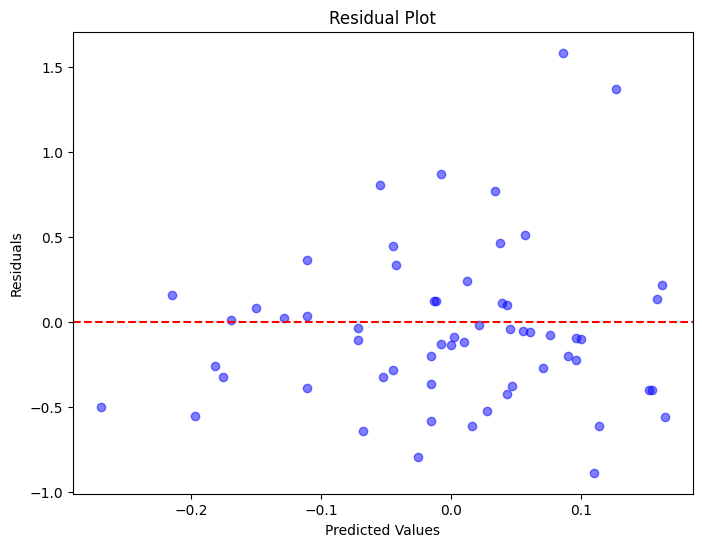

In [394]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


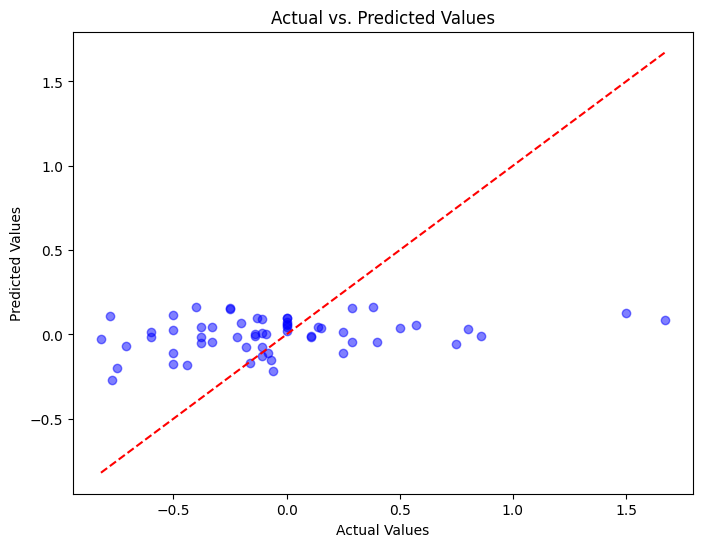

In [395]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [388]:
print(len(y_pred))

523


In [389]:
# Plotting each position separately
results_df = pd.DataFrame({
    'fantasy_pos': X_test['fantasy_pos'],
    'y_test': y_test,
    'y_pred': y_pred
})

positions = results_df['fantasy_pos'].unique()
fig, axes = plt.subplots(nrows=len(positions), figsize=(10, 8), sharex=True, sharey=True)


for i, pos in enumerate(positions):
    ax = axes[i]
    pos_data = results_df[results_df['fantasy_pos'] == pos]
    sns.scatterplot(x='y_test', y='y_pred', data=pos_data, ax=ax, label=f'{pos} Actual vs Predicted')
    ax.plot(pos_data['y_test'], pos_data['y_test'], color='red', linestyle='--')  # Plotting the perfect prediction line
    ax.set_title(f'{pos} Actual vs Predicted')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

KeyError: 'fantasy_pos'

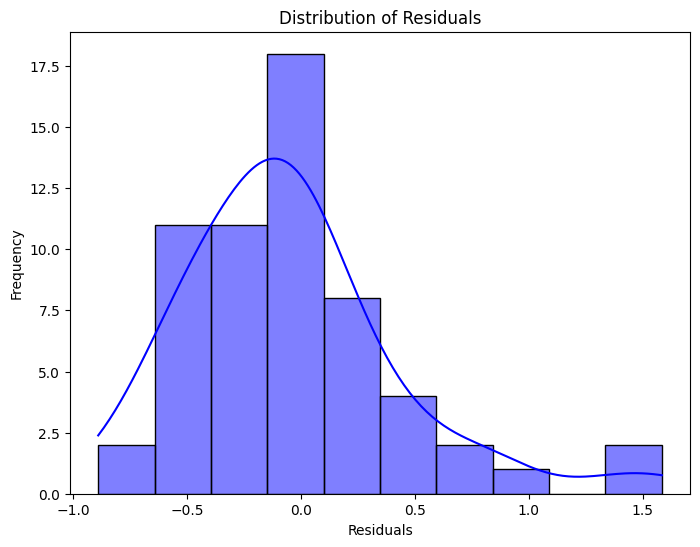

In [396]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

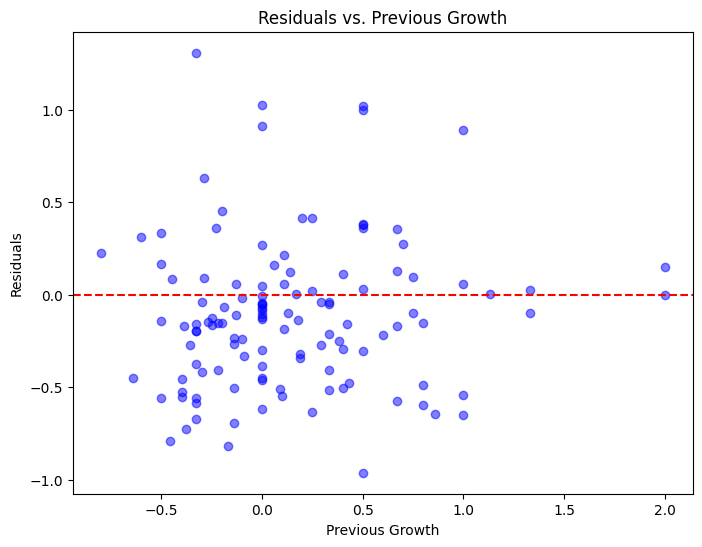

In [367]:
# Example for one feature, adjust for multiple features if needed
plt.figure(figsize=(8, 6))
plt.scatter(X_test['prev_growth'], residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Previous Growth')
plt.ylabel('Residuals')
plt.title('Residuals vs. Previous Growth')
plt.show()


In [397]:
y_pred_train = model.predict(X_train)


In [398]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"MAE on training data: {mae_train}")
print(f"MSE on training data: {mse_train}")
print(f"R-squared on training data: {r2_train}")


MAE on training data: 0.33381300886015325
MSE on training data: 0.18900776950646178
R-squared on training data: 0.08378319907266751
